# Decision trees

Making solution using Decision Tree algorithm; a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import tree
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
import graphviz 

In [2]:
moons = make_moons(n_samples=1000 , noise=0.3, random_state=0)
circles = make_circles(n_samples=1000 ,noise=0.2, factor=0.5, random_state=1)

moons_X , moons_y=  moons[0],  moons[1]
circles_X , circles_y=  circles[0],  circles[1]

In [3]:
def plot_data(data, classes, name):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(6,6))
    plt.scatter(data[:,0], data[:,1], c = classes, cmap=cm_bright)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(name)
    plt.show()

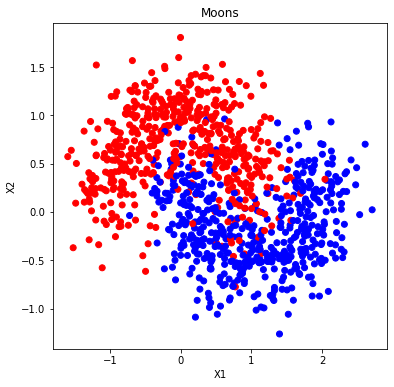

In [4]:
plot_data(moons_X, moons_y, 'Moons')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(moons_X, moons_y)

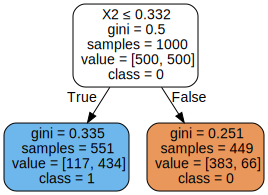

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names= ['X1', 'X2'],  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 

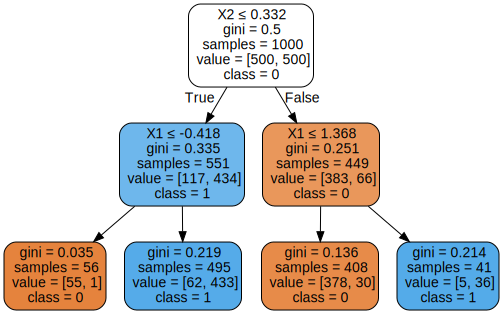

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(moons_X, moons_y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names= ['X1', 'X2'],  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 

In [9]:
def plot_decision_surface(X, y, clf ):
    h = .02  # step size in the mesh
    i = 1
    figure = plt.figure(figsize=(10, 6))
    
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 2, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,alpha=0.3,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())


    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)


    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


    plt.tight_layout()
    plt.show()

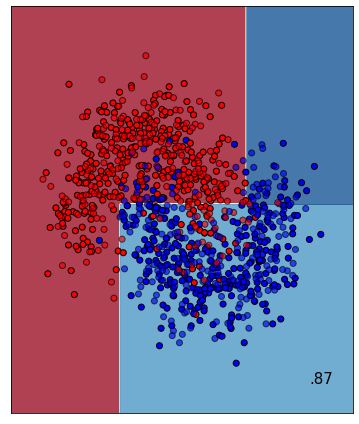

In [10]:
plot_decision_surface(moons_X, moons_y, clf)

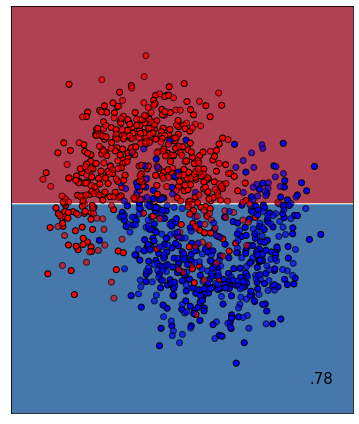

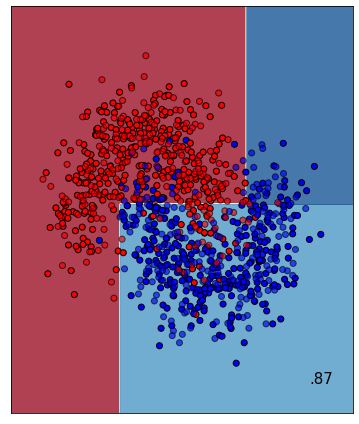

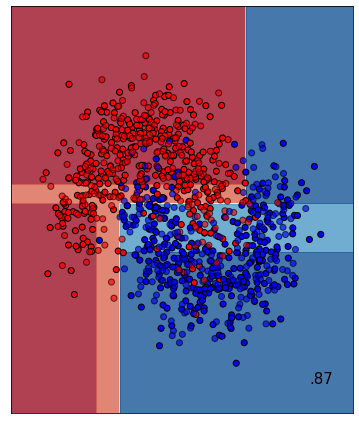

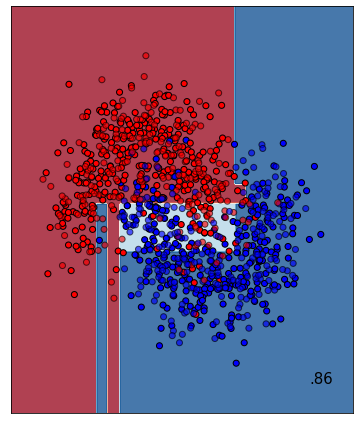

In [11]:
for md in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=md)
    clf = clf.fit(moons_X, moons_y)
    plot_decision_surface(moons_X, moons_y, clf)
    
   

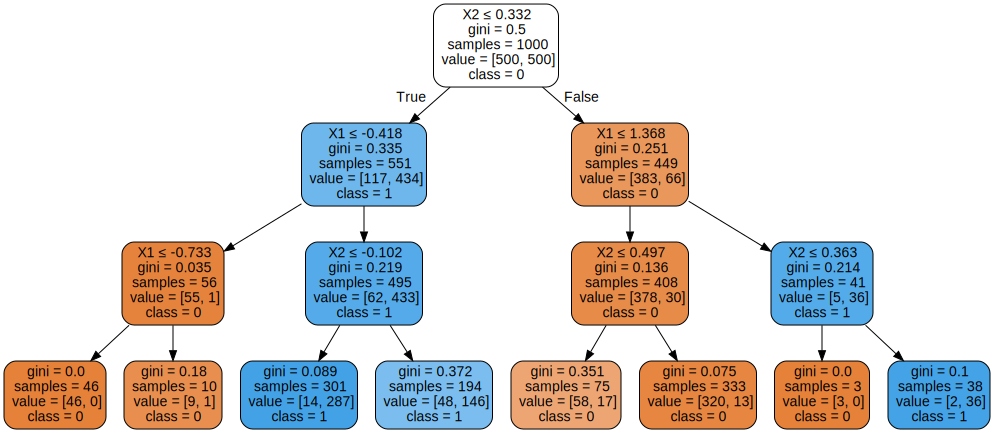

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(moons_X, moons_y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                 feature_names= ['X1', 'X2'],  
                 class_names=['0', '1'],  
                 filled=True, rounded=True,  
                 special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 

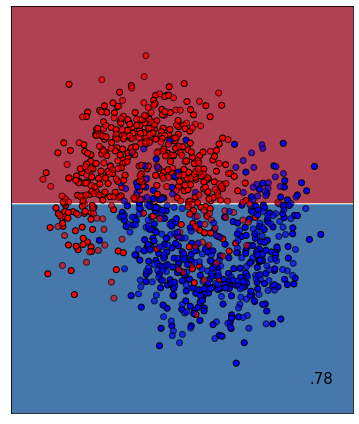

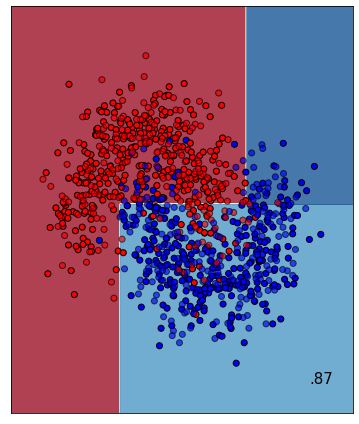

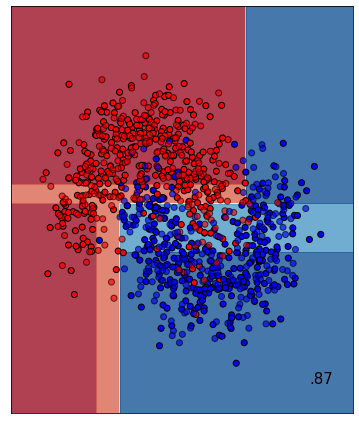

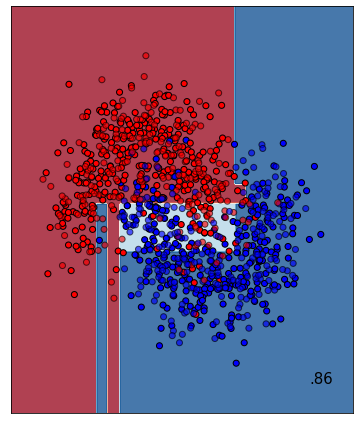

In [13]:
for md in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=md)
    clf = clf.fit(moons_X, moons_y)
    plot_decision_surface(moons_X, moons_y, clf)
    
   

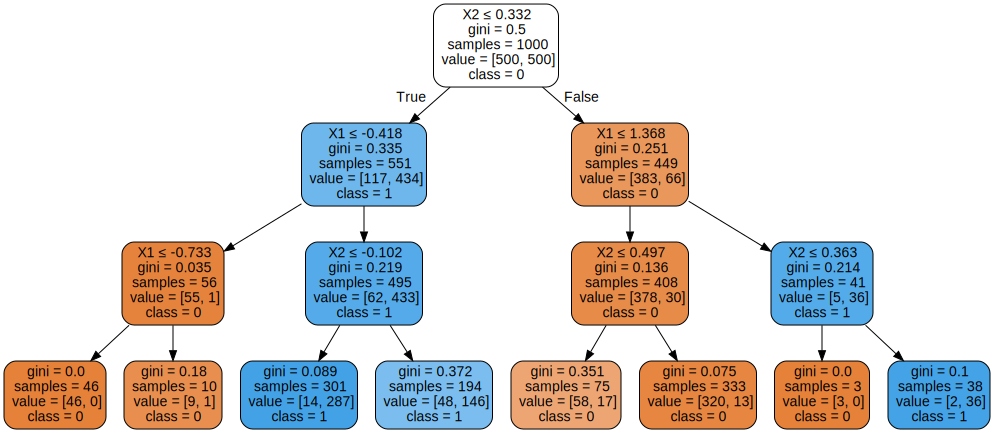

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(moons_X, moons_y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                 feature_names= ['X1', 'X2'],  
                 class_names=['0', '1'],  
                 filled=True, rounded=True,  
                 special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 

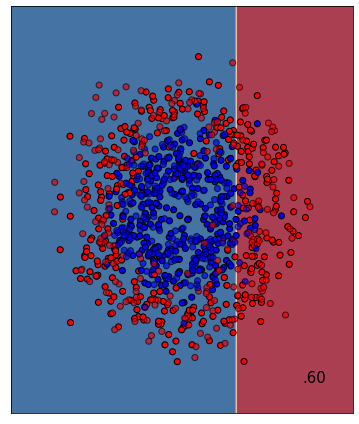

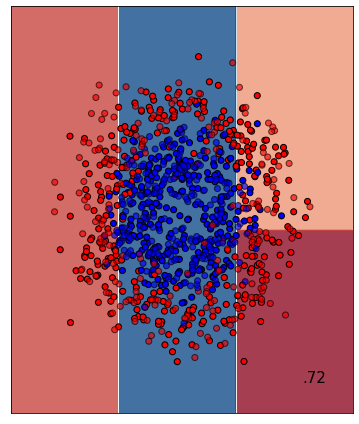

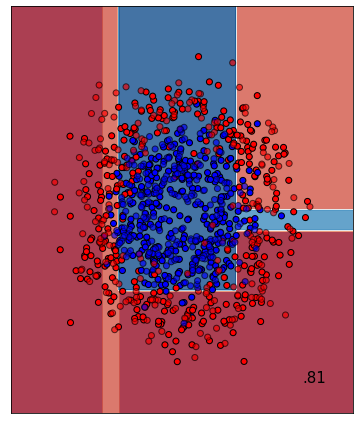

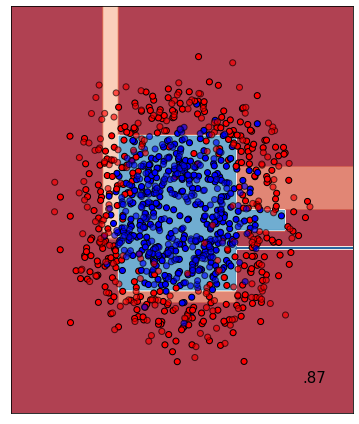

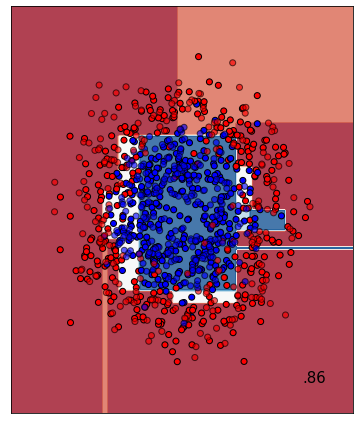

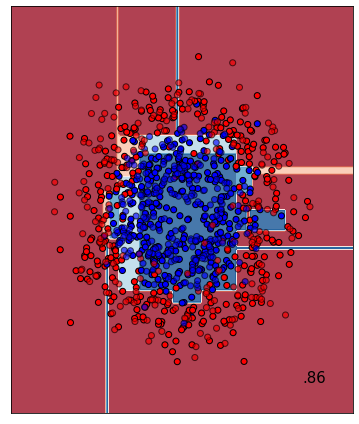

In [15]:
for md in range(1,7):
    clf = tree.DecisionTreeClassifier(max_depth=md)
    clf = clf.fit(circles_X, circles_y)
    plot_decision_surface(circles_X, circles_y, clf)
    
   